In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import scipy

In [2]:
import warnings
warnings.filterwarnings('ignore')

 ### Question-1

### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


     Minitab File : Cutlets.mtw


In [3]:
cutlets=pd.read_csv("Cutlets.csv")
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:

Unit_A=cutlets.iloc[:,0]
Unit_B=cutlets.iloc[:,1]

In [5]:
#Unit_A
mu_A=Unit_A.mean()
sd_A=Unit_B.std()
(mu_A, sd_A)

(7.01909142857143, 0.343400647063108)

In [6]:
#Unit B
mu_B=Unit_B.mean()
sd_B=Unit_B.std()

(mu_B, sd_B)

(6.964297142857142, 0.343400647063108)

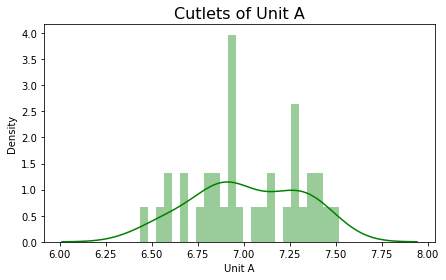

In [7]:
# To check if it appromximately follow a Normal Distribution.
plt.figure(figsize=(7,4))
plt.title("Cutlets of Unit A", fontsize=16)
sns.distplot(cutlets["Unit A"].dropna(), color='green', bins=25)
plt.show()

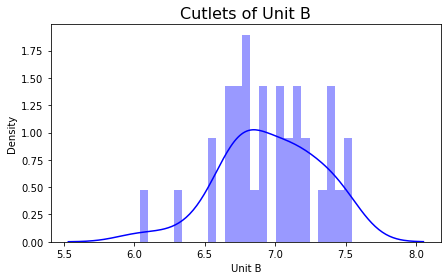

In [8]:
plt.figure(figsize=(7,4))
plt.title("Cutlets of Unit B", fontsize=16)
sns.distplot(cutlets["Unit B"].dropna(), color='Blue', bins=25)
plt.show()

**Data is not normally distributed**

In [9]:
# Run the Test ztest,pvalue

ztest,pvalue=sm.stats.ztest(cutlets["Unit A"].dropna(), cutlets["Unit B"].dropna(), alternative='two-sided')
print("P-Value:{0} Z-Test:{1}".format(pvalue,ztest))
if pValue >.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

P-Value:0.46976045023906055 Z-Test:0.7228688704678063


NameError: name 'pValue' is not defined

 ## Conclusion
 ### Since the p-value(0.46) is lower than the significance level 5%. We Reject the Null Hypothesis

# 

 ## Question 2
 ### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  ### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
 
    Minitab File: LabTAT.mtw


In [10]:
LabTAT=pd.read_csv("LabTAT.csv")
LabTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [11]:
stats.f_oneway(LabTAT.iloc[:,0], LabTAT.iloc[:,1], LabTAT.iloc[:,2], LabTAT.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [12]:
if pvalue >0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


 ## Conclusion
 ### Since the P-Value(2.11e-57) is extremely small and less then 5% singnificance level, we reject the Null Hypothesis. This means we can say that there is significant difference in the effects by the defferent Labs

# 

 ## Question -3
 ### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
    
    Buyer Ratio

In [13]:
Buyer_Ratio=pd.read_csv("BuyerRatio.csv")
Buyer_Ratio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [14]:
Males=[50,142,131,70]
Females=[432,1523,1356,750]
Sales=[Males,Females]
print(Sales)

[[50, 142, 131, 70], [432, 1523, 1356, 750]]


In [15]:
Chisquares_results=scipy.stats.chi2_contingency(Sales)
print('Test statistic=%f p-value=%f' % (Chisquares_results[0], Chisquares_results[1]))
print('Interpret by p-Value')
if Chisquares_results[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

Test statistic=1.703641 p-value=0.636125
Interpret by p-Value
we accept null hypothesis


 ## Conclusion
 ### Since P-Value is quite high ~0.63 we canot reject null hypothesis.The male - female buyer ratio are similar across regions

# 

## Question-4
 ### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Minitab File: CustomerOrderForm.mtw


In [21]:
minitab=pd.read_csv("Costomer+OrderForm.csv")
minitab.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [22]:
Phillippines_value=minitab['Phillippines'].value_counts()
Indonesia_value=minitab['Indonesia'].value_counts()
Malta_value=minitab['Malta'].value_counts()
India_value=minitab['India'].value_counts()
print(Phillippines_value)
print(Indonesia_value)
print(Malta_value)
print(India_value)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


In [23]:
Error_Free=[271,267,269,280]
Defective=[29,33,31,20]

In [24]:
customer_Order=[Error_Free, Defective]
print(customer_Order)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [25]:
Chisquares_results=scipy.stats.chi2_contingency(customer_Order)
print('Test statistic=%f p-value=%f' % (Chisquares_results[0], Chisquares_results[1]))
print('Interpret by p-Value')
if Chisquares_results[1] >0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

Test statistic=3.858961 p-value=0.277102
Interpret by p-Value
we reject null hypothesis


 ## Conclusion
 ### Since the P-Value(0.27)  less then 5% singnificance level, we reject the Null Hypothesis. This means we can say that there is significant difference in the effects by the defective %  varies by centre.

# 

 ## Question-5
 ### Fantaloons Sales managers commented that % of males versus females walking in to the store differ based on day of the week. Analyze the data and determine whether there is evidence at 5 % significance level to support this hypothesis.
 
Minitab File: Fantaloons.mtw


In [ ]:
Fantaloons=pd.read_csv("D:/Data Secience/Assignment/Hypothesis Testing/Faltoons.csv")
Fantaloons.head()

In [ ]:
Weekdays_value=Fantaloons['Weekdays'].value_counts()
Weekend_value=Fantaloons['Weekend'].value_counts()
print(Weekdays_value,Weekend_value)

In [ ]:
group=Fantaloons.groupby(['Weekdays','Weekend']).size()
Male_Female_count=np.array([280,520])
Total_number_M_F=np.array([400,400])

In [ ]:
sm.stats.proportions_ztest(Male_Female_count,Total_number_M_F, alternative='larger')

 ## Conclusion
 ### Since the P-Value(-inf, 1.0) is extremely small and less then 5% singnificance level, we reject the Null Hypothesis. Male and Female not walking in to the store same days.